In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 8) # 设置数据框显示最大行数

def hdisplay(dfs):
    from IPython.display import HTML
    elems = ['<div style="display:flex; justify-content: space-around;">']
    elems += [f'<div style="margin-right: 32px">{df.to_html()}</div>' for df in dfs]
    elems += ['</div>']
    display(HTML(''.join(elems)))


数据源：本笔记使用的GDP和常驻人口数据来自[国家统计局分省市年度数据](https://data.stats.gov.cn/easyquery.htm)

## 读取数据

In [2]:
df1 = pd.read_excel('data/分省年度-地区生产总值(亿元).xlsx')
df1.iloc[np.r_[0:4,-2:0], 0:5]

,数据库：分省年度数据,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,指标：地区生产总值(亿元),NaN,NaN,NaN,NaN
1,时间：1992-2023,NaN,NaN,NaN,NaN
2,地区,2022年,2021年,2020年,2019年
3,北京市,41610.9,41045.6,35943.3,35445.1
33,新疆维吾尔自治区,17741.3,16311.6,13800.7,13597.1
34,数据来源：国家统计局,NaN,NaN,NaN,NaN


<br>
从统计局网站下载的数据，附带了非表格的说明，需要跳过表头说明（3行）和表脚注（1行）

> 参加[`pd.read_execl`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
手册说明

In [3]:
df1 = pd.read_excel('data/分省年度-地区生产总值(亿元).xlsx', skiprows=3, skipfooter=1)
df1.iloc[np.r_[0:4,-2:0], 0:5]

,地区,2022年,2021年,2020年,2019年
0,北京市,41610.9,41045.6,35943.3,35445.1
1,天津市,16311.3,15685.1,14008.0,14055.5
2,河北省,42370.4,40397.1,36013.8,34978.6
3,山西省,25642.6,22870.4,17835.6,16961.6
29,宁夏回族自治区,5069.6,4588.2,3956.3,3748.5
30,新疆维吾尔自治区,17741.3,16311.6,13800.7,13597.1


<br>
将数据转换成长格式，数据字段包括地区、年度和GDP

In [4]:
df1 = pd.read_excel('data/分省年度-地区生产总值(亿元).xlsx', skiprows=3, skipfooter=1)

df1 = df1.melt(id_vars='地区', var_name='年度', value_name='GDP')
df1.年度 = df1.年度.str.replace('年', '').astype(int)
df1

,地区,年度,GDP
0,北京市,2022,41610.9
1,天津市,2022,16311.3
2,河北省,2022,42370.4
3,山西省,2022,25642.6
...,...,...,...
957,甘肃省,1992,317.8
958,青海省,1992,87.5
959,宁夏回族自治区,1992,83.1
960,新疆维吾尔自治区,1992,402.3


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   地区      961 non-null    object 
 1   年度      961 non-null    int64  
 2   GDP     961 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.6+ KB


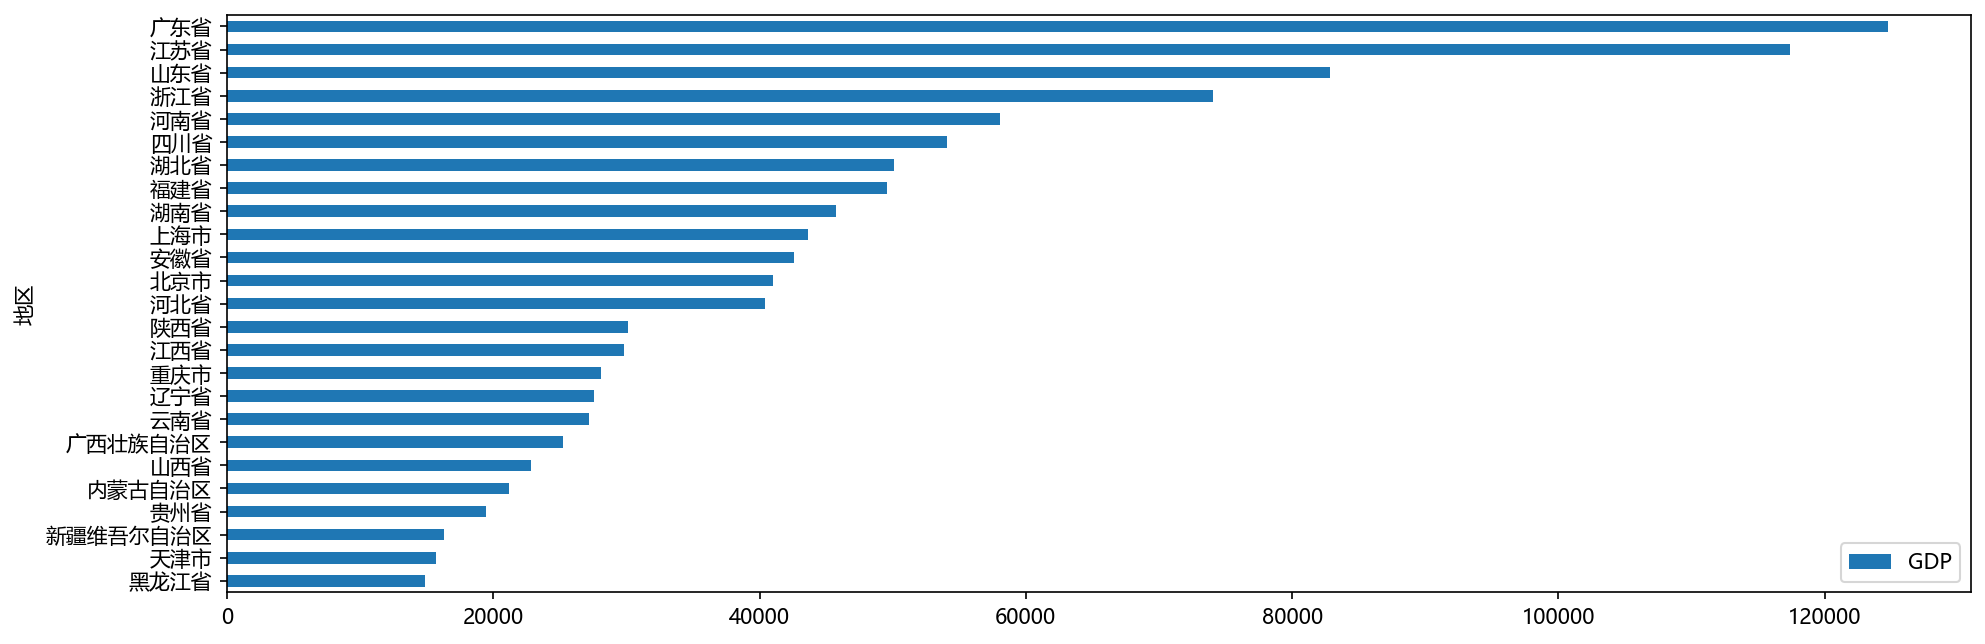

In [6]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=150)
df1[df1.年度==2021].sort_values(by="GDP")[-25:].plot.barh(x='地区', y='GDP', ax=ax);

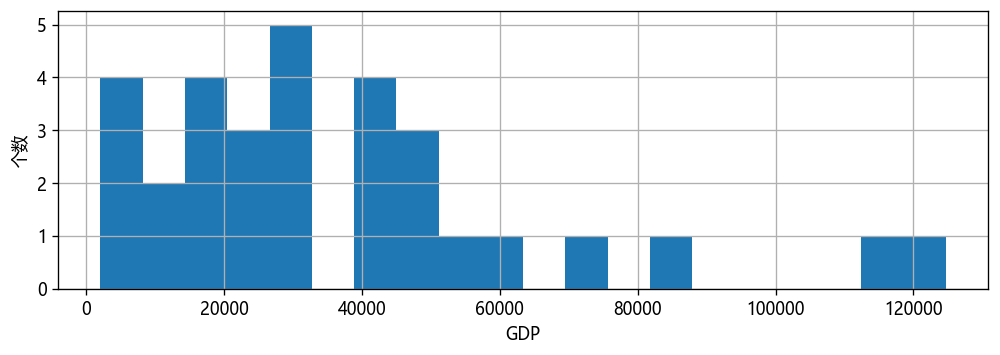

In [7]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=120)
df1[df1.年度==2021].GDP.plot.hist(bins=20, ax=ax)
ax.set_xlabel('GDP'); ax.set_ylabel('个数'); ax.grid()

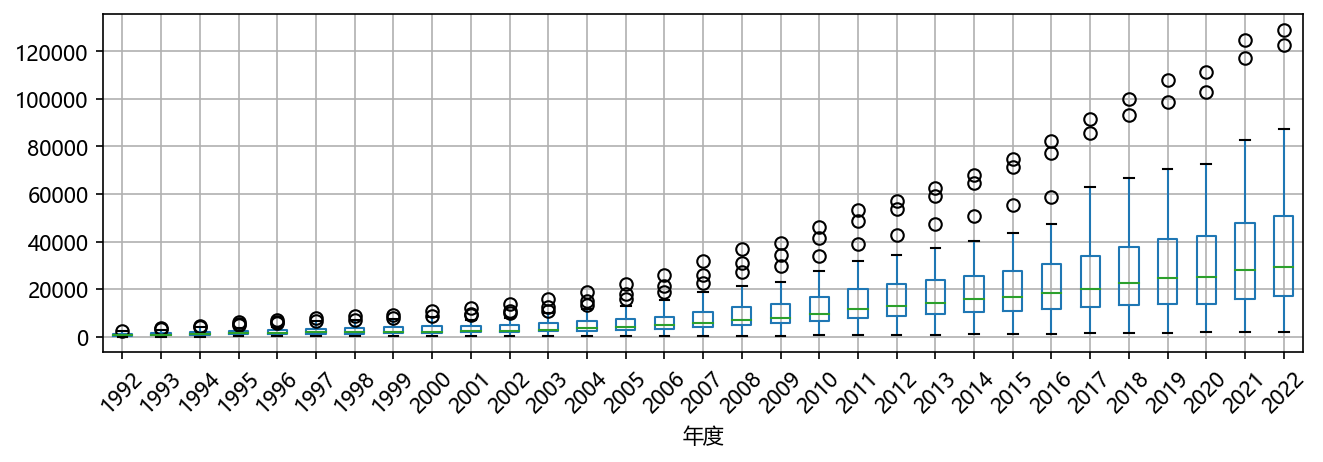

In [8]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)
df1.boxplot(column='GDP', by='年度', ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.set_title(''); fig.suptitle('');

### 直辖市GDP增长趋势

In [9]:
dft = df1.pivot(index="年度", columns="地区")
dft = dft.GDP[['北京市', '上海市', '重庆市', '天津市']]
dft.tail(5)

地区,北京市,上海市,重庆市,天津市
年度,,,,
2018,33106.0,36011.8,21588.8,13362.9
2019,35445.1,37987.6,23605.8,14055.5
2020,35943.3,38963.3,25041.4,14008.0
2021,41045.6,43653.2,28077.3,15685.1
2022,41610.9,44652.8,29129.0,16311.3


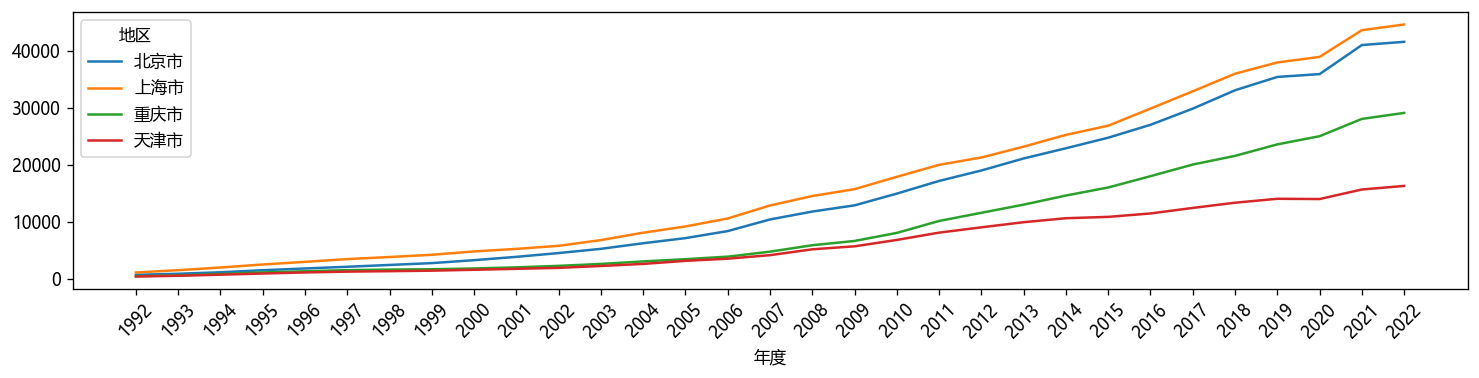

In [10]:
fig, ax = plt.subplots(figsize=(15, 3), dpi=120)
dft.plot.line(ax=ax)
ax.set_xticks(dft.index)
ax.tick_params(axis='x', rotation=45)

<br>
计算增长率

In [11]:
dft.shift(periods=1)

地区,北京市,上海市,重庆市,天津市
年度,,,,
1992,NaN,NaN,NaN,NaN
1993,710.2,1114.3,462.5,411.0
1994,888.9,1519.2,611.1,538.9
1995,1149.8,1990.9,838.1,732.9
...,...,...,...,...
2019,33106.0,36011.8,21588.8,13362.9
2020,35445.1,37987.6,23605.8,14055.5
2021,35943.3,38963.3,25041.4,14008.0
2022,41045.6,43653.2,28077.3,15685.1


In [12]:
dft / dft.shift(periods=1) - 1

地区,北京市,上海市,重庆市,天津市
年度,,,,
1992,NaN,NaN,NaN,NaN
1993,0.251619,0.363367,0.321297,0.311192
1994,0.293509,0.310492,0.371461,0.359993
1995,0.318664,0.264805,0.349004,0.271661
...,...,...,...,...
2019,0.070655,0.054865,0.093428,0.051830
2020,0.014056,0.025685,0.060816,-0.003379
2021,0.141954,0.120367,0.121235,0.119724
2022,0.013772,0.022899,0.037457,0.039923


In [13]:
dft.pct_change(periods=1)

地区,北京市,上海市,重庆市,天津市
年度,,,,
1992,NaN,NaN,NaN,NaN
1993,0.251619,0.363367,0.321297,0.311192
1994,0.293509,0.310492,0.371461,0.359993
1995,0.318664,0.264805,0.349004,0.271661
...,...,...,...,...
2019,0.070655,0.054865,0.093428,0.051830
2020,0.014056,0.025685,0.060816,-0.003379
2021,0.141954,0.120367,0.121235,0.119724
2022,0.013772,0.022899,0.037457,0.039923


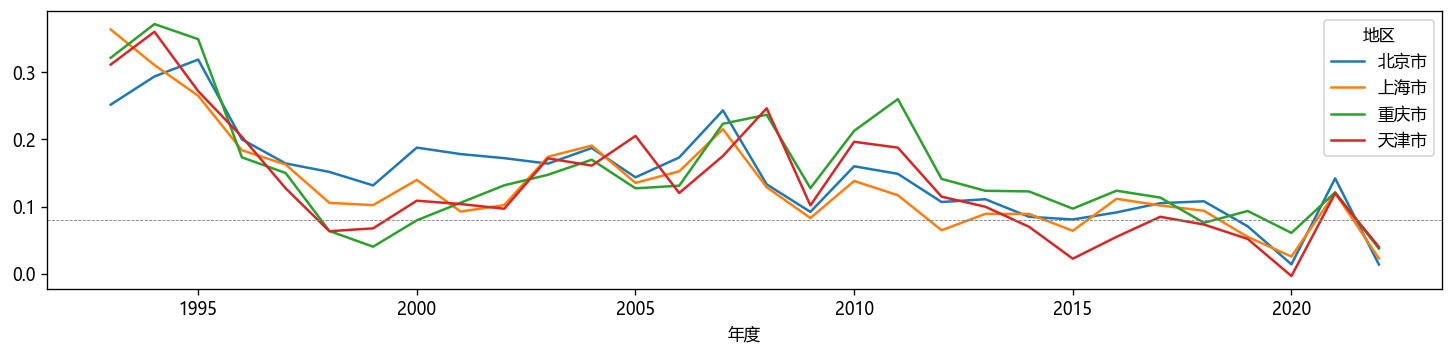

In [14]:
fig, ax = plt.subplots(figsize=(15, 3), dpi=120)
dft.pct_change(periods=1).plot.line(ax=ax)
ax.axhline(0.08, c="grey", lw=0.5, ls="--");

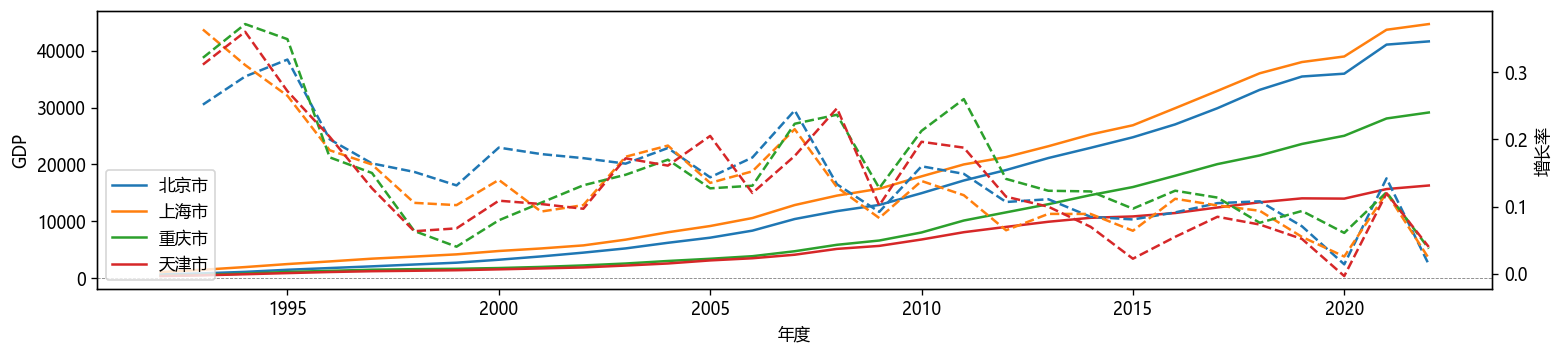

In [15]:
fig, ax = plt.subplots(figsize=(15, 3), dpi=120)
dft.plot.line(ax=ax)
ax.axhline(0.08, c="grey", lw=0.5, ls="--");

ax2 = ax.twinx() # 获得附属坐标系
dft.pct_change(periods=1).plot.line(ax=ax2, ls='--')
ax2.get_legend().remove()
ax.set_ylabel('GDP'); ax2.set_ylabel('增长率');
ax.legend(loc='lower left');

<br>

## 连接人口数据

In [16]:
df1 = pd.read_excel('data/分省年度-地区生产总值(亿元).xlsx', skiprows=[0, 1, 2, 35])
df1 = df1.melt(id_vars="地区", var_name="年度", value_name="GDP")
df1.年度 = df1.年度.str.replace("年", "").astype(int)

In [17]:
df2 = pd.read_excel("data/分省年度-年末常住人口(万人).xlsx", skiprows=[0, 1, 2, 35, 36])
df2 = df2.melt(id_vars="地区", var_name="年度", value_name="常驻人口")
df2.年度 = df2.年度.str.replace("年", "").astype(int)

In [18]:
hdisplay([df1.iloc[np.r_[:2, -2:0]], df2.iloc[np.r_[:2, -2:0]]])

,地区,年度,GDP
0,北京市,2022,41610.9
1,天津市,2022,16311.3
959,宁夏回族自治区,1992,83.1
960,新疆维吾尔自治区,1992,402.3
,地区,年度,常驻人口
0,北京市,2022,2184
1,天津市,2022,1363
711,宁夏回族自治区,2000,554
712,新疆维吾尔自治区,2000,1849


In [19]:
df3 = df1.merge(df2, how="inner", on=["地区", "年度"])
df3

,地区,年度,GDP,常驻人口
0,北京市,2022,41610.9,2184
1,天津市,2022,16311.3,1363
2,河北省,2022,42370.4,7420
3,山西省,2022,25642.6,3481
...,...,...,...,...
709,甘肃省,2000,1052.9,2515
710,青海省,2000,263.7,517
711,宁夏回族自治区,2000,295.0,554
712,新疆维吾尔自治区,2000,1363.6,1849


## 计算人均GDP

In [20]:
df3["人均GDP"] = df3.GDP / df3.常驻人口 * (10000000 / 10000) # 亿 / 万人
df3

,地区,年度,GDP,常驻人口,人均GDP
0,北京市,2022,41610.9,2184,19052.609890
1,天津市,2022,16311.3,1363,11967.204696
2,河北省,2022,42370.4,7420,5710.296496
3,山西省,2022,25642.6,3481,7366.446423
...,...,...,...,...,...
709,甘肃省,2000,1052.9,2515,418.648111
710,青海省,2000,263.7,517,510.058027
711,宁夏回族自治区,2000,295.0,554,532.490975
712,新疆维吾尔自治区,2000,1363.6,1849,737.479719


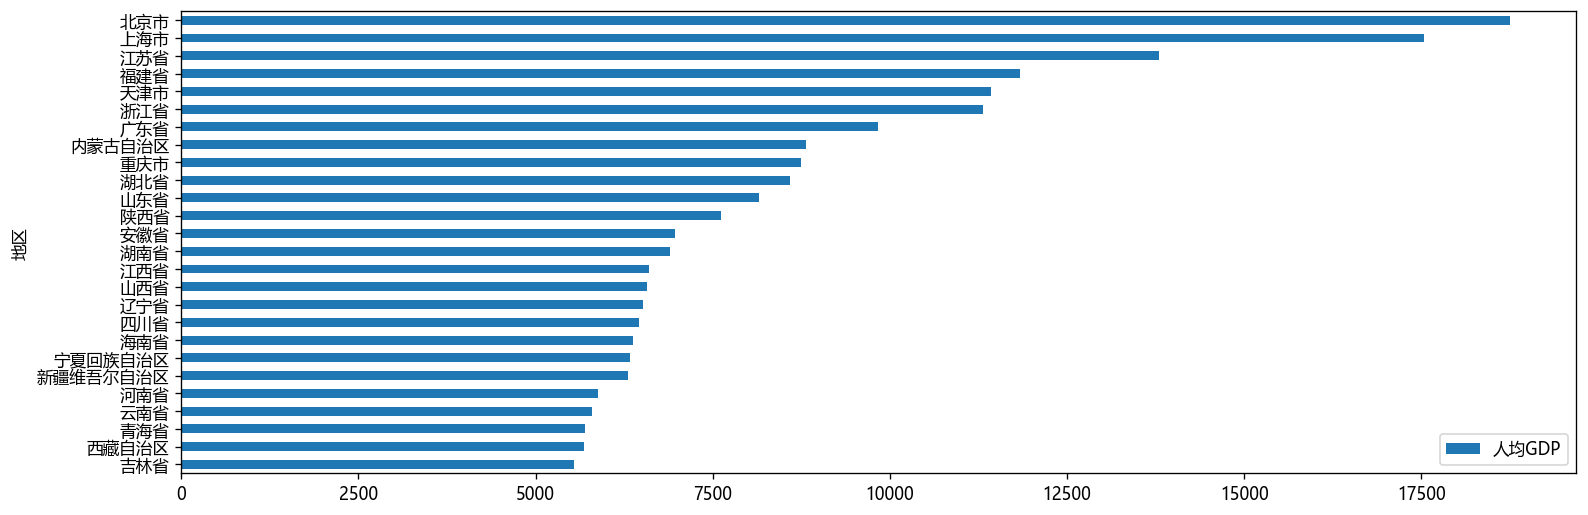

In [21]:
dft = df3[df3.年度 == 2021].sort_values("人均GDP", ascending=True)[-26:]

fig, ax = plt.subplots(figsize=(15, 5), dpi=120)
dft.plot.barh(x="地区", y="人均GDP", ax=ax);

In [22]:
df3.groupby(['年度'])[['GDP', '常驻人口']].mean().head(3)

,GDP,常驻人口
年度,,
2000,3165.625806,4064.354839
2001,3487.322581,4083.193548
2002,3870.935484,4107.064516


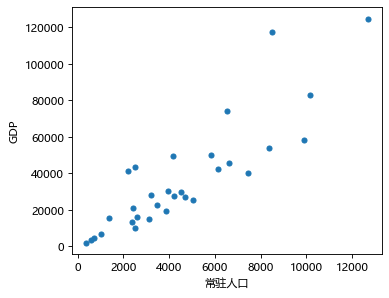

In [23]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
df3[df3.年度== 2021].plot.scatter(x="常驻人口", y="GDP", ax=ax);

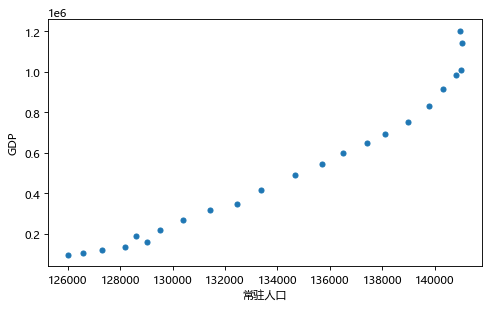

In [24]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=80)
df3.groupby(['年度'])[['GDP', '常驻人口']].sum().plot.scatter(x="常驻人口", y="GDP", ax=ax);

## 按经济区分析

In [25]:
df3

,地区,年度,GDP,常驻人口,人均GDP
0,北京市,2022,41610.9,2184,19052.609890
1,天津市,2022,16311.3,1363,11967.204696
2,河北省,2022,42370.4,7420,5710.296496
3,山西省,2022,25642.6,3481,7366.446423
...,...,...,...,...,...
709,甘肃省,2000,1052.9,2515,418.648111
710,青海省,2000,263.7,517,510.058027
711,宁夏回族自治区,2000,295.0,554,532.490975
712,新疆维吾尔自治区,2000,1363.6,1849,737.479719


In [26]:
areas = {
    "长江三角洲": ["上海市", "江苏省", "浙江省"],
    "环渤海地区": ["北京市", "天津市", "河北省", "辽宁省", "山东省"],
    "泛珠三角": ["福建省", "江西省", "湖南省", "广东省", "广西壮族自治区", "海南省", "四川省", "贵州省", "云南省"],
}

df4 = df3.copy()
df4["经济区"] = df3.地区.map({c: a for a, cities in areas.items() for c in cities})

In [27]:
df4

,地区,年度,GDP,常驻人口,人均GDP,经济区
0,北京市,2022,41610.9,2184,19052.609890,环渤海地区
1,天津市,2022,16311.3,1363,11967.204696,环渤海地区
2,河北省,2022,42370.4,7420,5710.296496,环渤海地区
3,山西省,2022,25642.6,3481,7366.446423,NaN
...,...,...,...,...,...,...
709,甘肃省,2000,1052.9,2515,418.648111,NaN
710,青海省,2000,263.7,517,510.058027,NaN
711,宁夏回族自治区,2000,295.0,554,532.490975,NaN
712,新疆维吾尔自治区,2000,1363.6,1849,737.479719,NaN


In [28]:
df5 = df4.groupby(['经济区', '年度'])[['GDP', '常驻人口']].sum().reset_index()
df5 = df5.pivot(index='年度', columns='经济区')
df5.tail(5)

GDP                       常驻人口              
经济区       泛珠三角     环渤海地区     长江三角洲   泛珠三角  环渤海地区  长江三角洲
年度                                                     
2018  301353.6  169122.9  187222.2  50375  25369  17194
2019  327799.7  179875.0  199106.4  50672  25405  17325
2020  340689.6  183774.7  206460.1  50931  25460  17433
2021  382248.3  207572.5  235086.4  50981  25409  17534
2022  401961.3  216702.8  245243.8  50974  25327  17567

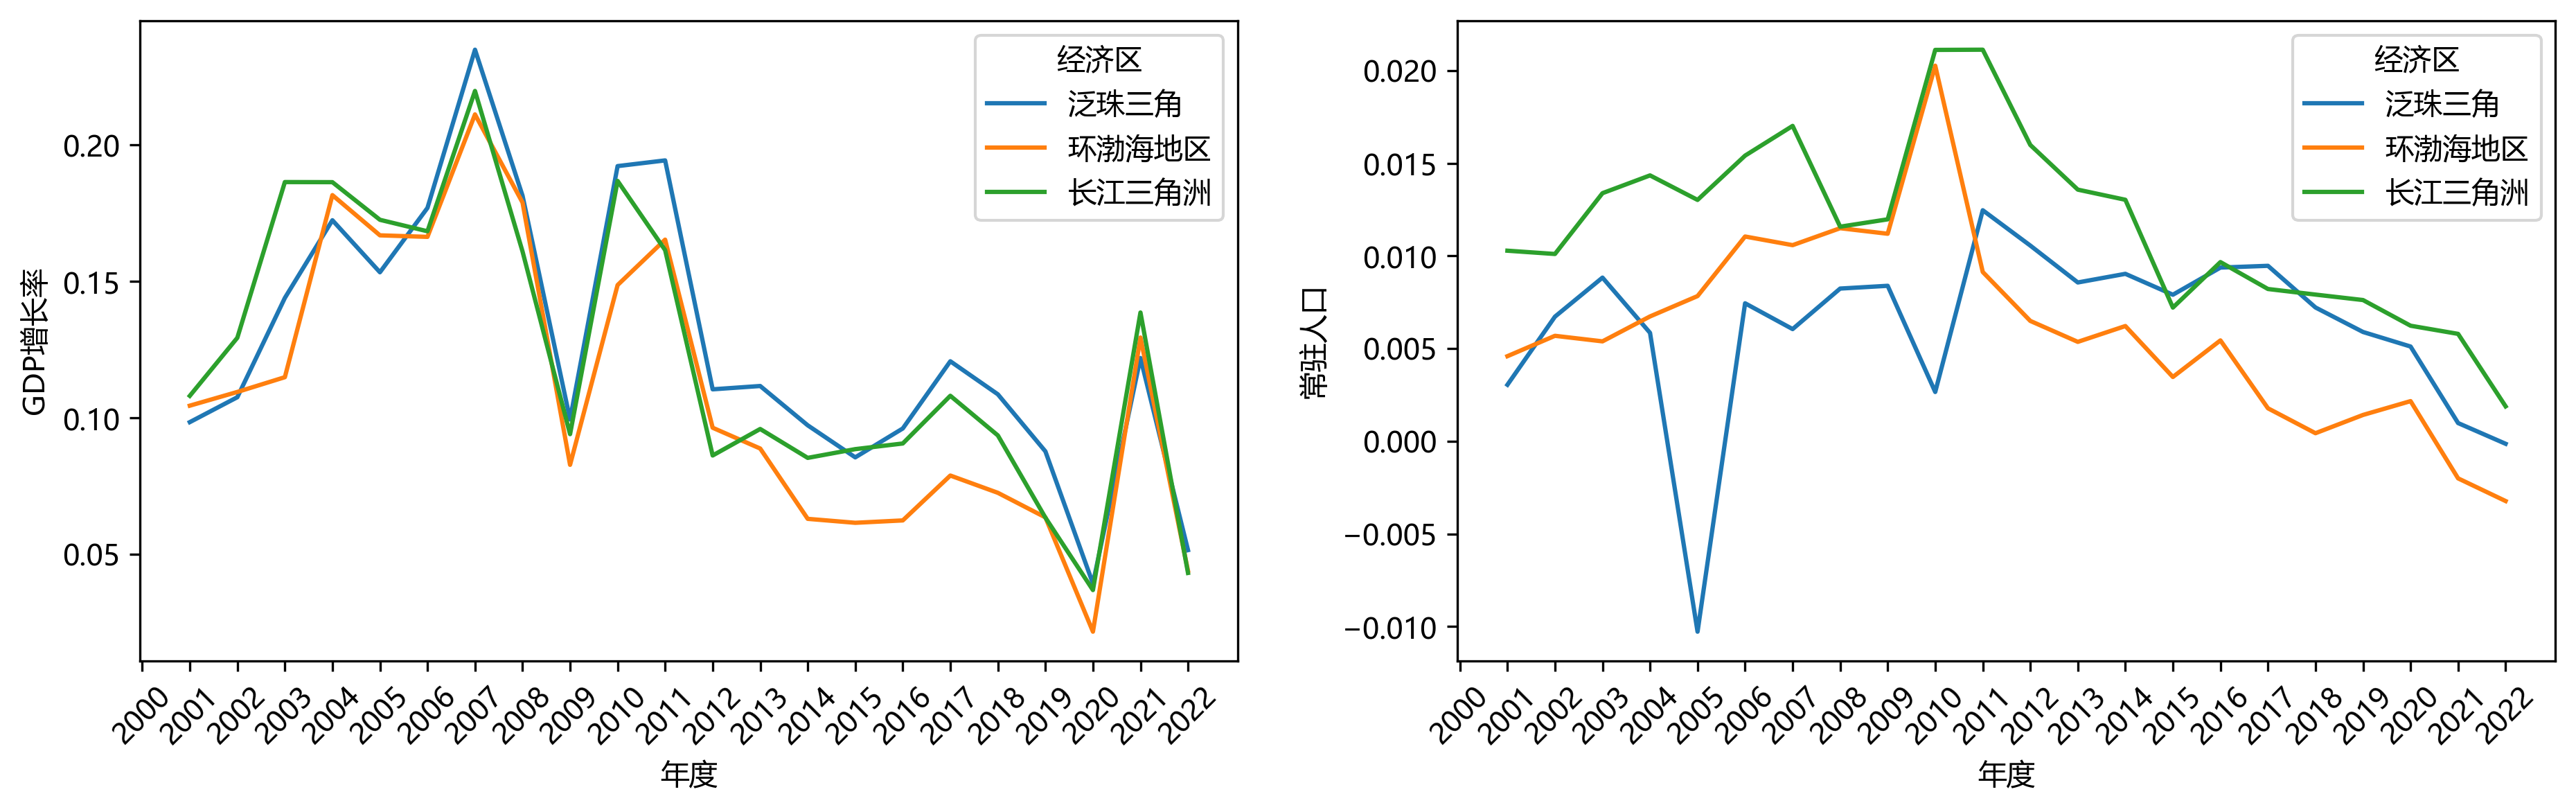

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=300)

ax = axes[0]
df5.GDP.pct_change(periods=1).plot.line(ax=ax)
ax.set_xticks(df5.index)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel("GDP增长率")

ax = axes[1]
df5.常驻人口.pct_change(periods=1).plot.line(ax=ax)
ax.set_xticks(df5.index)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel("常驻人口");